### Install the package

In [1]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-y7tc36i_
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-y7tc36i_
     |████████████████████████████████| 2.9 MB 5.2 MB/s 
     |████████████████████████████████| 3.3 MB 50.1 MB/s 
     |████████████████████████████████| 948 kB 65.2 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=34604 sha256=aaa10ae550be7cd530c49f3b87880d51fd4f42fed706a3273281808edbe2315e
  Stored in directory: /tmp/pip-ephem-wheel-cache-abql464y/wheels/78/73/a2/4ee9fce73985dcc4f889d3d012a4461d58254d0de99197af00
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Attempting uninstall: 

### Download the dataset

In [ ]:
! wget https://github.com/divamgupta/datasets/releases/download/seg/dataset1.zip && unzip dataset1.zip

### Initialize the model

In [3]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=50 ,  input_height=320, input_width=640  )


58900480/58889256 [==============================] - 1s 0us/step


### Train the model

In [4]:
model.train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=5  
)

Verifying training dataset


100%|██████████| 367/367 [00:02<00:00, 172.34it/s]


Dataset verified! 
Epoch 1/5
512/512 [==============================] - ETA: 0s - loss: 0.8606 - accuracy: 0.7484
Epoch 1: saving model to /tmp/vgg_unet_1.00001
512/512 [==============================] - 116s 196ms/step - loss: 0.8606 - accuracy: 0.7484
Epoch 2/5
512/512 [==============================] - ETA: 0s - loss: 0.5019 - accuracy: 0.8434
Epoch 2: saving model to /tmp/vgg_unet_1.00002
512/512 [==============================] - 99s 193ms/step - loss: 0.5019 - accuracy: 0.8434
Epoch 3/5
512/512 [==============================] - ETA: 0s - loss: 0.3939 - accuracy: 0.8749
Epoch 3: saving model to /tmp/vgg_unet_1.00003
512/512 [==============================] - 99s 192ms/step - loss: 0.3939 - accuracy: 0.8749
Epoch 4/5
512/512 [==============================] - ETA: 0s - loss: 0.3238 - accuracy: 0.8955
Epoch 4: saving model to /tmp/vgg_unet_1.00004
512/512 [==============================] - 98s 192ms/step - loss: 0.3238 - accuracy: 0.8955
Epoch 5/5
512/512 [=========================

In [5]:
out = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png"
)

In [6]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

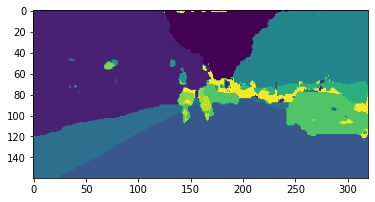

In [7]:
plt.imshow(out)

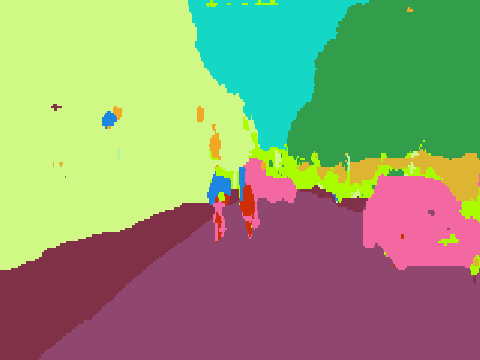

In [8]:
from IPython.display import Image
Image('/tmp/out.png')

In [9]:
o = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)

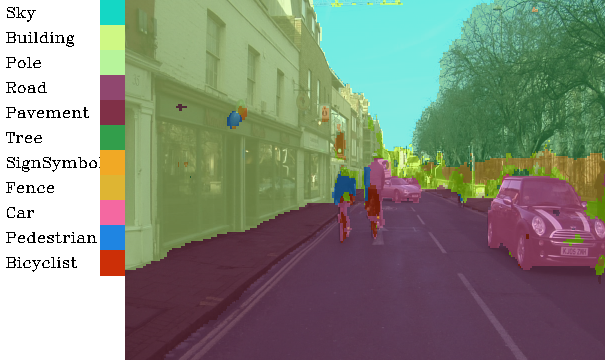

In [10]:
from IPython.display import Image
Image('/tmp/out.png')